In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [3]:
CE2JE = pd.read_csv('./magazine/final/CE2JE_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [4]:
CE2JE['ADFN_2'] = CE2JE['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [5]:
CE2JE['ADFN_2']

0      [골드, 장식, 포인트, 준, 케이프, 체크, 코트, 백, 산드로, Sandro, ...
1                 [대, 에스닉, 분위기, 물씬, CELINE, 방패, 모양, 숄더백]
2      [재킷, 셔츠, 크리스, CELINE, CELINE, 팬츠, 다잉브, 리드, 슈즈,...
3      [격자, 무늬, 트렌치코트, 백, 와이드, 팬츠, 지방시, 밤색, 터틀넥, 르, 안...
4      [민트, 색, 후드, 톱, 크롬, 하츠, Chrome, Hearts, 안경, CEL...
                             ...                        
728    [서로, 팬임, 인증, 스타, 세레나, 고메즈, 함께한, 컬래버레이션, 곡, 아이스...
729    [내셔널, 아이스크림, 데이, 기념, 귀엽다, 포스팅, 제니, 멤버, 아이스크림, ...
730    [한국, 신진, 디자이너, 하이, 패션, 브랜드, 섭렵, 블핑, 컴백, 티징, 비주...
731    [솔로, 곡, 발매, 오는, 정규, 앨범, 컴백, 예정, 멤버, 솔로, 곡, 순차,...
732    [K, 그룹, 최초, 뚜두뚜두, DDU, DU, DDU, DU, 뮤직비디오, 뷰를,...
Name: ADFN_2, Length: 733, dtype: object

### top50 리스트 생성

In [6]:
top500 = pd.read_csv('./CE2JE_top500.csv', sep='|', encoding = 'utf-8')

In [7]:
top500

,word,count
0,제니,9280
1,귀엽다,2241
2,예쁘다,1818
3,CELINE,895
4,사랑,837
...,...,...
495,걸,37
496,옴므,37
497,대표,37
498,m,37


In [8]:
top30 = []
for i in range(30):
    top30.append(top500.loc[i, 'word'])
    
print(len(top30))
print(top30)

30
['제니', '귀엽다', '예쁘다', 'CELINE', '사랑', '얼굴', '매력', '패션', '노래', '무대', '옷', '스타일', '아이돌', 'CHANEL', '컬러', '최고', '브랜드', '룩', '컬렉션', '여자', '젠득', '팬', '느낌', '실력', 'SLIMANE', 'HEDI', '영어', '앞머리', '모습', '시즌']


In [9]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['제니', '귀엽다', '예쁘다', 'CELINE', '사랑', '얼굴', '매력', '패션', '노래', '무대', '옷', '스타일', '아이돌', 'CHANEL', '컬러', '최고', '브랜드', '룩', '컬렉션', '여자', '젠득', '팬', '느낌', '실력', 'SLIMANE', 'HEDI', '영어', '앞머리', '모습', '시즌', '디자이너', '예능', '랩', '백', '매치', '드레스', '분위기', '춤', '쇼', '목소리', '블랙', '표정', '팬츠', '모델', '멤버', '연출', '여성', '공주', '발음', '연예인']


### top100

In [10]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['제니', '귀엽다', '예쁘다', 'CELINE', '사랑', '얼굴', '매력', '패션', '노래', '무대', '옷', '스타일', '아이돌', 'CHANEL', '컬러', '최고', '브랜드', '룩', '컬렉션', '여자', '젠득', '팬', '느낌', '실력', 'SLIMANE', 'HEDI', '영어', '앞머리', '모습', '시즌', '디자이너', '예능', '랩', '백', '매치', '드레스', '분위기', '춤', '쇼', '목소리', '블랙', '표정', '팬츠', '모델', '멤버', '연출', '여성', '공주', '발음', '연예인', '재킷', '고급', '치마', '디자인', '사랑스럽다', '라이브', '장식', '포인트', '아이템', '의상', '남성', '스타일링', '세상', '지난', '그룹', '입덕', '한국', '좋다', '파리', '인간', '많은', '화이트', '라인', '마음', '썸네일', '애기', '새로운', '완성', '스타', '레전드', '가장', '메이크업', '좋겠다', '레드', '코트', 'PHILO', '이미지', '쿠마', '외모', '디렉터', 'LAURENT', 'PHOEBE', '티', 'SAINT', '솔로', '볼', '멋있다', '복', '소화', '남자']


In [11]:
top200 = []
for i in range(200):
    top200.append(top500.loc[i, 'word'])
    
print(len(top200))
print(top200)

200
['제니', '귀엽다', '예쁘다', 'CELINE', '사랑', '얼굴', '매력', '패션', '노래', '무대', '옷', '스타일', '아이돌', 'CHANEL', '컬러', '최고', '브랜드', '룩', '컬렉션', '여자', '젠득', '팬', '느낌', '실력', 'SLIMANE', 'HEDI', '영어', '앞머리', '모습', '시즌', '디자이너', '예능', '랩', '백', '매치', '드레스', '분위기', '춤', '쇼', '목소리', '블랙', '표정', '팬츠', '모델', '멤버', '연출', '여성', '공주', '발음', '연예인', '재킷', '고급', '치마', '디자인', '사랑스럽다', '라이브', '장식', '포인트', '아이템', '의상', '남성', '스타일링', '세상', '지난', '그룹', '입덕', '한국', '좋다', '파리', '인간', '많은', '화이트', '라인', '마음', '썸네일', '애기', '새로운', '완성', '스타', '레전드', '가장', '메이크업', '좋겠다', '레드', '코트', 'PHILO', '이미지', '쿠마', '외모', '디렉터', 'LAURENT', 'PHOEBE', '티', 'SAINT', '솔로', '볼', '멋있다', '복', '소화', '남자', '데뷔', '데님', '인기', '대한', '가수', '웃기', '시크', '셔츠', '영국', '활동', '키', '코디', '선택', '살', '여름', '탑', '대', '세계', '고양이', '공개', '소재', '다양한', '미쳤다', '블링크', '니트', 'DIOR', '컴백', '트렌드', '스커트', '선글라스', '곱창', '성격', '집', '최근', '마지막', '영화', '타팬', '핑크', '관심', '몸', '미국', '몸매', '손', '심장', '런웨이', '톱', '어깨', '밴드', '명', '화보', '소리', '하이틴', '아름다운', '걸그룹', '좋아요', '크리에이

In [12]:
top300 = []
for i in range(300):
    top300.append(top500.loc[i, 'word'])
    
print(len(top300))
print(top300)

300
['제니', '귀엽다', '예쁘다', 'CELINE', '사랑', '얼굴', '매력', '패션', '노래', '무대', '옷', '스타일', '아이돌', 'CHANEL', '컬러', '최고', '브랜드', '룩', '컬렉션', '여자', '젠득', '팬', '느낌', '실력', 'SLIMANE', 'HEDI', '영어', '앞머리', '모습', '시즌', '디자이너', '예능', '랩', '백', '매치', '드레스', '분위기', '춤', '쇼', '목소리', '블랙', '표정', '팬츠', '모델', '멤버', '연출', '여성', '공주', '발음', '연예인', '재킷', '고급', '치마', '디자인', '사랑스럽다', '라이브', '장식', '포인트', '아이템', '의상', '남성', '스타일링', '세상', '지난', '그룹', '입덕', '한국', '좋다', '파리', '인간', '많은', '화이트', '라인', '마음', '썸네일', '애기', '새로운', '완성', '스타', '레전드', '가장', '메이크업', '좋겠다', '레드', '코트', 'PHILO', '이미지', '쿠마', '외모', '디렉터', 'LAURENT', 'PHOEBE', '티', 'SAINT', '솔로', '볼', '멋있다', '복', '소화', '남자', '데뷔', '데님', '인기', '대한', '가수', '웃기', '시크', '셔츠', '영국', '활동', '키', '코디', '선택', '살', '여름', '탑', '대', '세계', '고양이', '공개', '소재', '다양한', '미쳤다', '블링크', '니트', 'DIOR', '컴백', '트렌드', '스커트', '선글라스', '곱창', '성격', '집', '최근', '마지막', '영화', '타팬', '핑크', '관심', '몸', '미국', '몸매', '손', '심장', '런웨이', '톱', '어깨', '밴드', '명', '화보', '소리', '하이틴', '아름다운', '걸그룹', '좋아요', '크리에이

In [13]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500[:91])

500
['제니', '귀엽다', '예쁘다', 'CELINE', '사랑', '얼굴', '매력', '패션', '노래', '무대', '옷', '스타일', '아이돌', 'CHANEL', '컬러', '최고', '브랜드', '룩', '컬렉션', '여자', '젠득', '팬', '느낌', '실력', 'SLIMANE', 'HEDI', '영어', '앞머리', '모습', '시즌', '디자이너', '예능', '랩', '백', '매치', '드레스', '분위기', '춤', '쇼', '목소리', '블랙', '표정', '팬츠', '모델', '멤버', '연출', '여성', '공주', '발음', '연예인', '재킷', '고급', '치마', '디자인', '사랑스럽다', '라이브', '장식', '포인트', '아이템', '의상', '남성', '스타일링', '세상', '지난', '그룹', '입덕', '한국', '좋다', '파리', '인간', '많은', '화이트', '라인', '마음', '썸네일', '애기', '새로운', '완성', '스타', '레전드', '가장', '메이크업', '좋겠다', '레드', '코트', 'PHILO', '이미지', '쿠마', '외모', '디렉터', 'LAURENT']


### top50만 남기기

In [14]:
len(CE2JE)

733

In [15]:
top30_word = []
for i in range(len(CE2JE)):
    w=[]
    for word in CE2JE.loc[i, 'ADFN_2']:
        if word in top30:
            w.append(word)
    top30_word.append(w)

In [16]:
top50_word = []
for i in range(len(CE2JE)):
    w=[]
    for word in CE2JE.loc[i, 'ADFN_2']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [17]:
top100_word = []
for i in range(len(CE2JE)):
    w=[]
    for word in CE2JE.loc[i, 'ADFN_2']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [18]:
top200_word = []
for i in range(len(CE2JE)):
    w=[]
    for word in CE2JE.loc[i, 'ADFN_2']:
        if word in top200:
            w.append(word)
    top200_word.append(w)

In [19]:
top300_word = []
for i in range(len(CE2JE)):
    w=[]
    for word in CE2JE.loc[i, 'ADFN_2']:
        if word in top300:
            w.append(word)
    top300_word.append(w)

In [20]:
top500_word = []
for i in range(len(CE2JE)):
    w=[]
    for word in CE2JE.loc[i, 'ADFN_2']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### 전체

In [21]:
CE2JE

,magazine,brand,title,word,ADFN,ADFN_2
0,A,Ce,코트 체크,"골드 잠금 장식으로 포인트를 준 케이프 체크 코트는 1백9만원, 산드로(SANDRO...","['골드', '장식', '포인트', '준', '케이프', '체크', '코트', '백...","[골드, 장식, 포인트, 준, 케이프, 체크, 코트, 백, 산드로, Sandro, ..."
1,A,Ce,남자 백’까지 갖고 싶어,1970년대 에스닉한 분위기가 물씬 풍기는 CELINE의 방패 모양 숄더백.,"['대', '에스', '닉', '분위기', '물씬', 'CELINE', '방패', ...","[대, 에스닉, 분위기, 물씬, CELINE, 방패, 모양, 숄더백]"
2,A,Ce,"GOOD TIME, 헨리","재킷, 셔츠, 네크리스는 모두 CELINE(CELINE), 팬츠는 다잉브리드, 슈즈...","['재킷', '셔츠', '크리스', 'CELINE', 'CELINE', '팬츠', ...","[재킷, 셔츠, 크리스, CELINE, CELINE, 팬츠, 다잉브, 리드, 슈즈,..."
3,A,Ce,"가을의 정석, 트렌치 코트 입는 법 8가지","격자무늬 트렌치코트는 4백26만5천원, 와이드 팬츠는 가격미정, 지방시. 밤색 터틀...","['격자', '무늬', '트렌치코트', '백', '와이드', '팬츠', '지방시',...","[격자, 무늬, 트렌치코트, 백, 와이드, 팬츠, 지방시, 밤색, 터틀넥, 르, 안..."
4,A,Ce,하나만 걸쳐도 남달라! 후디 입는 법 12,"민트색 후드 톱은 가격미정, 크롬하츠(CHROME HEARTS). 안경은 52만원,...","['민트', '색', '후드', '톱', '크롬', '하츠', 'Chrome', '...","[민트, 색, 후드, 톱, 크롬, 하츠, Chrome, Hearts, 안경, CEL..."
...,...,...,...,...,...,...
728,W,Je,"블랙핑크X세레나 고메즈 영상통화, 협업 티징","서로의 팬임을 인증한 두 스타, 8월 28일 BLACKPINK와 세레나 고메즈가 함...","['서로', '팬임', '인증', '두', '스타', 'BLACKPINK', '세레...","[서로, 팬임, 인증, 스타, 세레나, 고메즈, 함께한, 컬래버레이션, 곡, 아이스..."
729,W,Je,블랙핑크가 아이스크림 셀카를 올린 이유는?,"내셔널 아이스크림 데이’를 기념한 BLACKPINK의 귀여운 포스팅., 제니와 리사...","['내셔널', '아이스크림', '데이', '기념', 'BLACKPINK', '귀여운...","[내셔널, 아이스크림, 데이, 기념, 귀엽다, 포스팅, 제니, 멤버, 아이스크림, ..."
730,W,Je,블랙핑크 컴백! 남다른 패션 스타일링,"한국 신진 디자이너부터 하이 패션 브랜드까지 섭렵한 블핑, 6월 26일 드디어 BL...","['한국', '신진', '디자이너', '하이', '패션', '브랜드', '섭렵', ...","[한국, 신진, 디자이너, 하이, 패션, 브랜드, 섭렵, 블핑, 컴백, 티징, 비주..."
731,W,Je,"블랙핑크 로제, 리사, 지수 솔로곡 공개한다","BLACKPINK 로제, 리사, 지수의 솔로곡이 발매된다., , 오는 9월 첫 정규...","['BLACKPINK', '로제', '리사', '지수', '솔로', '곡', '발매...","[솔로, 곡, 발매, 오는, 정규, 앨범, 컴백, 예정, 멤버, 솔로, 곡, 순차,..."


### item 남기기

In [22]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [23]:
# item_word = []
# for i in range(len(mag_je)):
#     w=[]
#     for word in mag_je.loc[i, 'ADFN']:
#         if word in item:
#             w.append(word)
#     item_word.append(w)

### top100이면서 item이 아닌 것

In [24]:
# top100_not_item_word = []
# for i in range(len(tot_je)):
#     w=[]
#     for word in tot_je.loc[i, 'ADFN']:
#         if word in top100:
#             if word not in item:
#                 w.append(word)
#     top100_not_item_word.append(w)

In [25]:
# len(top100_not_item_word)

In [26]:
# top100_not_item_word[1]

In [27]:
top50_word

[['백', '팬츠', '컬러', '백', '백', 'CELINE', 'CELINE', 'CELINE'],
 ['분위기', 'CELINE'],
 ['CELINE', 'CELINE', '팬츠'],
 ['백', '팬츠', 'CELINE', 'CELINE'],
 ['CELINE', 'CELINE', '백', '블랙', 'CELINE', '블랙', '컬러', '컬러'],
 ['컬러', '컬러', '백', '백', 'CELINE', 'CELINE'],
 ['CELINE', 'CELINE', '컬러', 'CHANEL', 'CHANEL', '팬츠'],
 ['모습', '시즌', 'CELINE', '드레스', '분위기'],
 ['팬츠', 'CELINE', 'CELINE', '팬츠', 'CELINE'],
 ['블랙', '스타일', 'CELINE', 'CELINE', '팬츠'],
 ['시즌', '스타일', 'CELINE', '컬렉션', '백', '컬러', '컬러', 'CELINE', 'CELINE'],
 ['스타일', 'CELINE', 'CELINE', '블랙', '패션', '디자이너', 'CELINE'],
 ['CELINE', 'HEDI', 'SLIMANE', 'CELINE', 'HEDI', 'SLIMANE'],
 ['룩',
  '브랜드',
  '컬러',
  '매치',
  '룩',
  '옷',
  '디자이너',
  'CELINE',
  '디자이너',
  '옷',
  '여자',
  '옷',
  '옷',
  '패션',
  '옷',
  '옷',
  '옷',
  '옷'],
 ['팬츠', 'CELINE', 'HEDI', 'SLIMANE', 'CELINE', 'HEDI', 'SLIMANE'],
 ['백', 'CELINE', 'HEDI', 'SLIMANE', 'CELINE', 'HEDI', 'SLIMANE'],
 ['CELINE', 'HEDI', 'SLIMANE', 'CELINE', 'HEDI', 'SLIMANE'],
 ['CELINE', 'HEDI', 'SLIMANE', 'CELINE',

In [28]:
len(top50_word)

733

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [29]:
# 어프라이어리(Apriori)
from apyori import apriori

In [30]:
top30_word[0]

['컬러', 'CELINE', 'CELINE', 'CELINE']

In [39]:
# 지지도(support) : P(A∩B)
result = list(apriori(top500_word, min_support = 0.1))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
54,"(CELINE, 브랜드)",0.154161,"[((), (CELINE, 브랜드), 0.15416098226466576, 1.0)...",2
70,"(스타일, 제니)",0.152797,"[((), (스타일, 제니), 0.15279672578444747, 1.0), ((...",2
57,"(CELINE, 컬렉션)",0.152797,"[((), (CELINE, 컬렉션), 0.15279672578444747, 1.0)...",2
75,"(패션, 제니)",0.148704,"[((), (패션, 제니), 0.14870395634379263, 1.0), ((제...",2
58,"(패션, CELINE)",0.147340,"[((), (패션, CELINE), 0.14733969986357434, 1.0),...",2
56,"(CELINE, 시즌)",0.140518,"[((), (CELINE, 시즌), 0.14051841746248295, 1.0),...",2
51,"(CELINE, 디자이너)",0.139154,"[((), (CELINE, 디자이너), 0.13915416098226466, 1.0...",2
64,"(매력, 제니)",0.129604,"[((), (매력, 제니), 0.1296043656207367, 1.0), ((매력...",2
60,"(SLIMANE, HEDI)",0.126876,"[((), (SLIMANE, HEDI), 0.12687585266030013, 1....",2
50,"(SLIMANE, CELINE)",0.125512,"[((), (SLIMANE, CELINE), 0.12551159618008187, ...",2


In [40]:
for item in df['items']:
    if '제니' in item:
        print(item)

frozenset({'스타일', '제니'})
frozenset({'패션', '제니'})
frozenset({'매력', '제니'})
frozenset({'CHANEL', '제니'})
frozenset({'제니', '룩'})
frozenset({'포인트', '제니'})
frozenset({'제니', '사랑'})
frozenset({'매치', '제니'})
frozenset({'컬러', '제니'})
frozenset({'얼굴', '제니'})
frozenset({'모습', '제니'})
frozenset({'연출', '제니'})
frozenset({'귀엽다', '제니'})
frozenset({'블랙', '제니'})


In [41]:
df[df['items'] == {'제니'}]

,items,support,ordered_statistics,length


### networkx 그래프 정의

In [42]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [43]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [44]:
pos = nx.spring_layout(G)

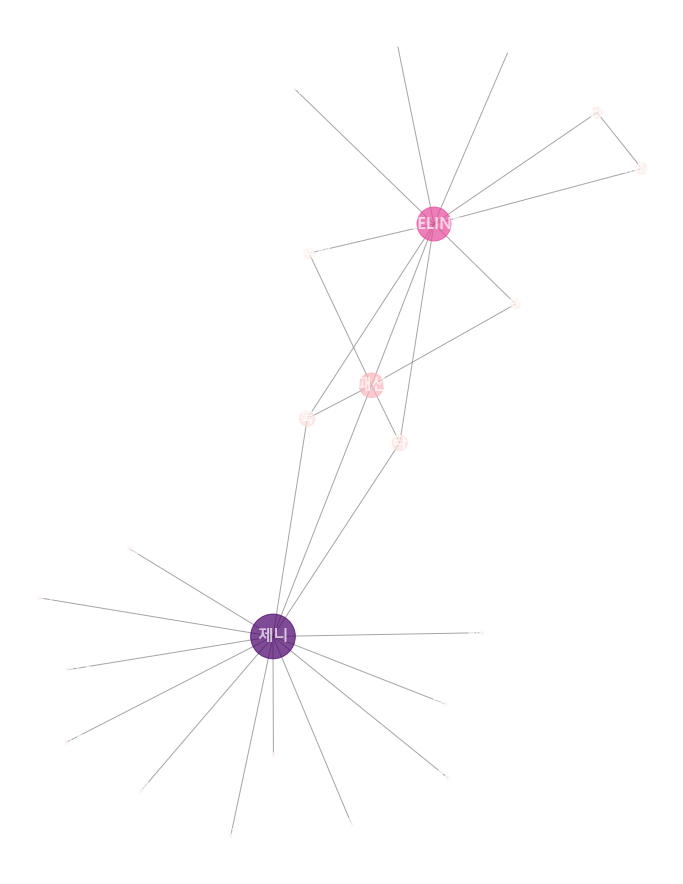

In [45]:
plt.figure(figsize = (12, 16)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.RdPu,
                font_color = 'white', font_weight = 'bold')

plt.savefig('./final_img/nt_CE2JE_top500_mis1-w.png', bbox_inches = 'tight', transparent = True)
plt.show()


In [38]:
# ['첫', '처음', '공개', '작업', '이후', '펜디', '판매', '작품', '드', '예정', '시대']